In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def filtering(image, mask):
  shift_row = mask.shape[0]//2
  shift_col = mask.shape[1]//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  # Filtrado
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      result[i,j] = np.sum(aux*mask)
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

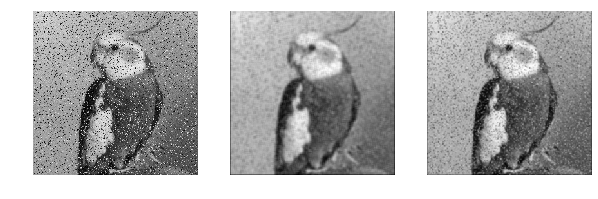

In [3]:
# img = cv2.imread("filter.png", 0)
img = cv2.imread("lorito.jpg", 0)

m = 5
mask = (1/(m*m))*np.ones((m, m))
# mask = (1/9)*np.ones((3, 3))

res = filtering(img, mask)

mask = np.ones((3, 3))
mask[1][0] = mask[1][2] = mask[0][1] = mask[2][1] = 2
mask[0][0] = mask[0][2] = mask[2][0] = mask[2][2] = 1
mask[1][1] = 4

res2 = filtering(img, mask)

plt.figure(figsize=(10, 10))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(res, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(res2, cmap="gray")
plt.show()

In [0]:
def filtroMediana(image, size):
  shift_row = size//2
  shift_col = size//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  
  result = np.zeros(new_image.shape, np.float32)
  
  # Filtrado
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      val = np.sort(aux, axis=None)
      result[i,j] = val[(size**2)//2]
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

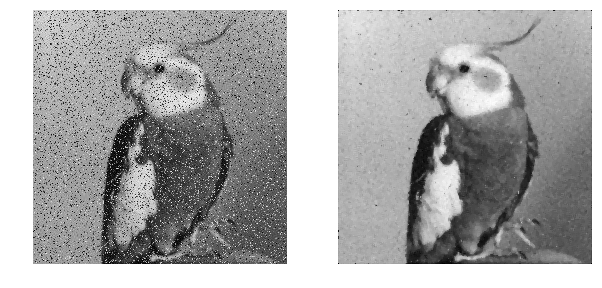

In [12]:
img = cv2.imread("lorito.jpg", 0)

res = filtroMediana(img, 3)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

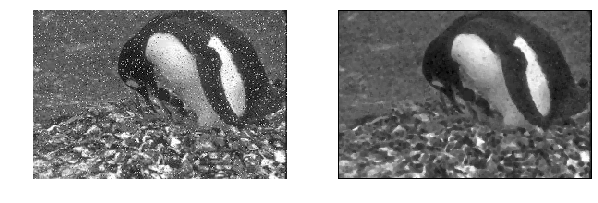

In [14]:
img = cv2.imread("pinguin.jpg", 0)

res = filtroMediana(img, 2)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()

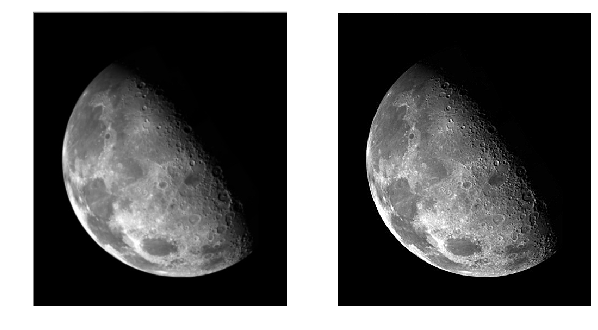

In [16]:
img = cv2.imread("moon.jpg", 0)

mask = np.ones((3, 3))
mask[1][0] = mask[1][2] = mask[0][1] = mask[2][1] = 1
mask[0][0] = mask[0][2] = mask[2][0] = mask[2][2] = 0
mask[1][1] = -4

laplacian = filtering(img, mask)
out = img - laplacian

np.clip(out, 0, 255, out=out)
res = out.astype('uint8')

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(out, cmap="gray")
plt.show()

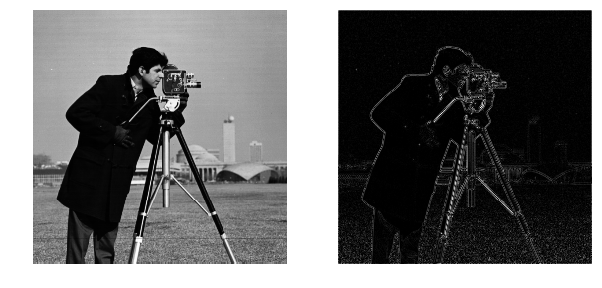

In [18]:
img = cv2.imread("cameraman.tif", 0)

mask1 = np.ones((3, 3))
mask1[1][2] = 1
mask1[1][1] = -1

res1 = filtering(img, mask)

mask2 = np.ones((3, 3))
mask2[2][1] = 1
mask2[1][1] = -1

res2 = filtering(img, mask)

out = np.sqrt(res1**2 + res2**2)

# np.clip(out, 0, 255, out=out)
# res = out.astype('uint8')

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(out, cmap="gray")
plt.show()